# Import Packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Define Lorenz System

Unlike previous code snippets, this definition of the Lorenz system returns an array, which is helpful in completing the 3D plot

In [14]:
# Define the Lorenz system
def lorenz(state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Simulating the Lorenz Attractor for Different Values of Rho

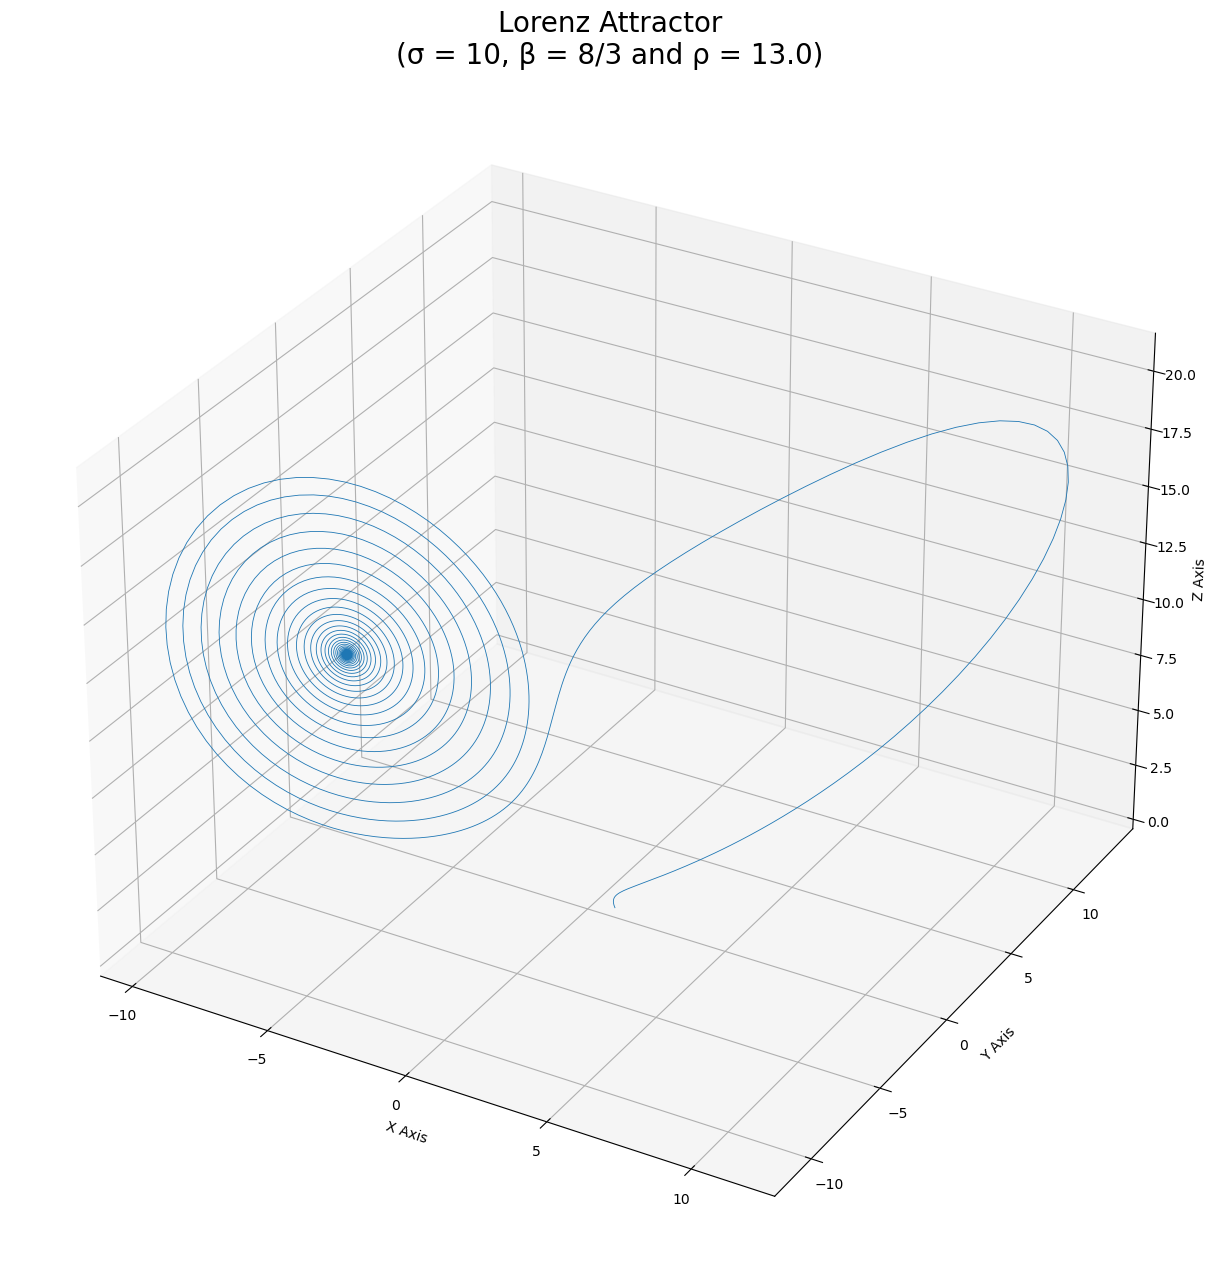

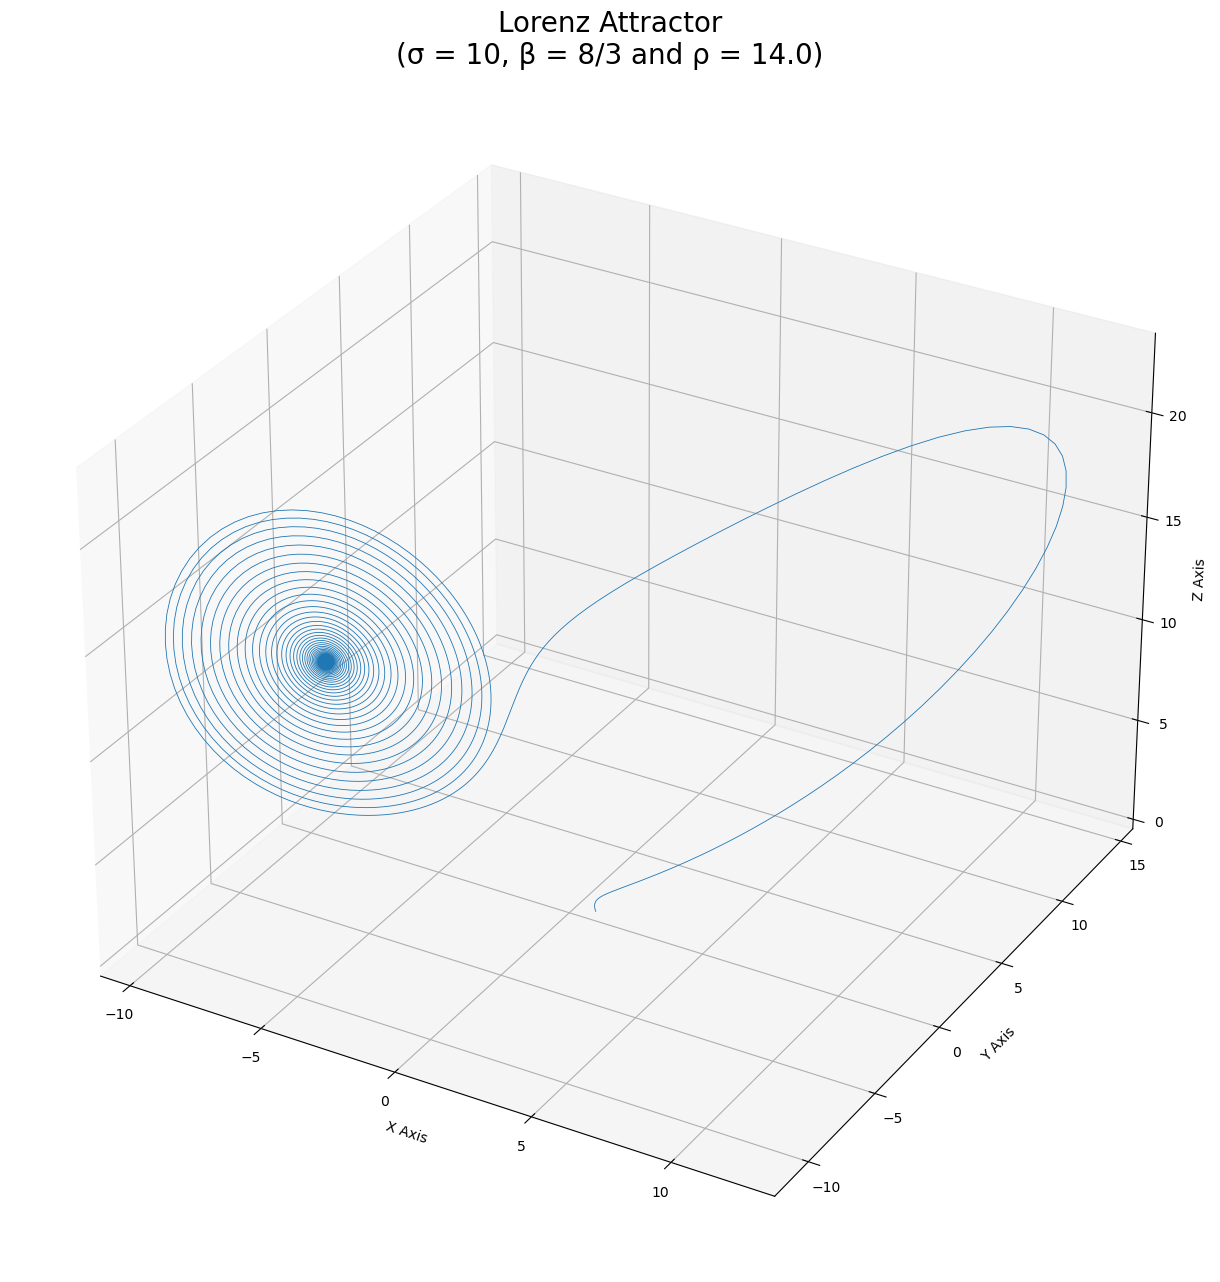

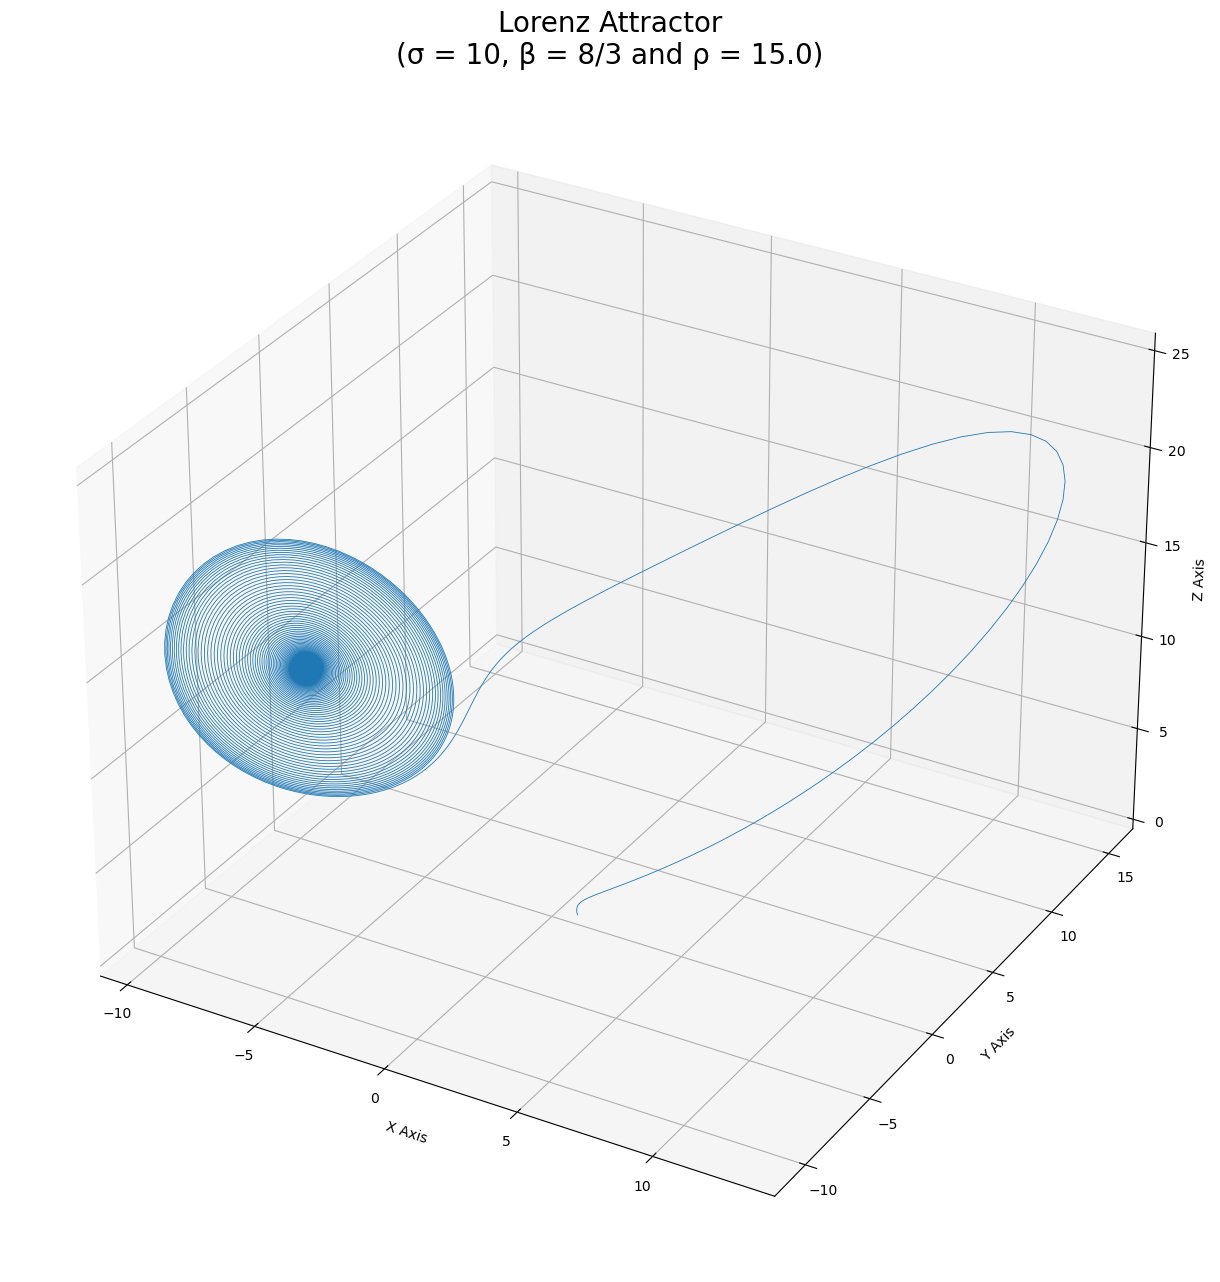

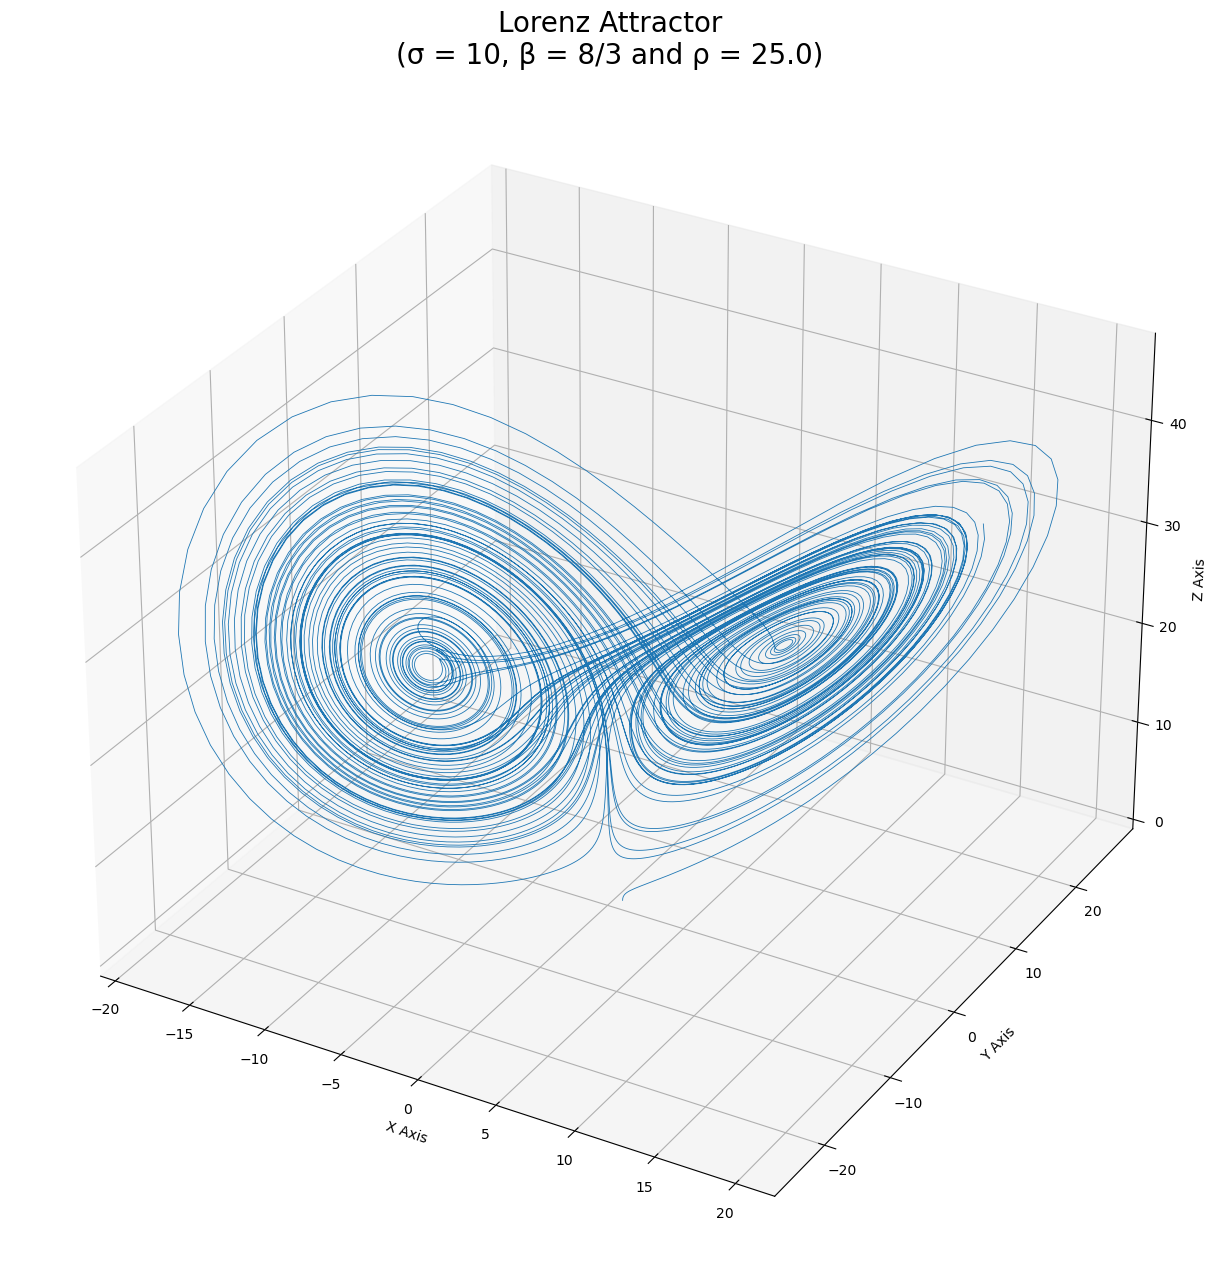

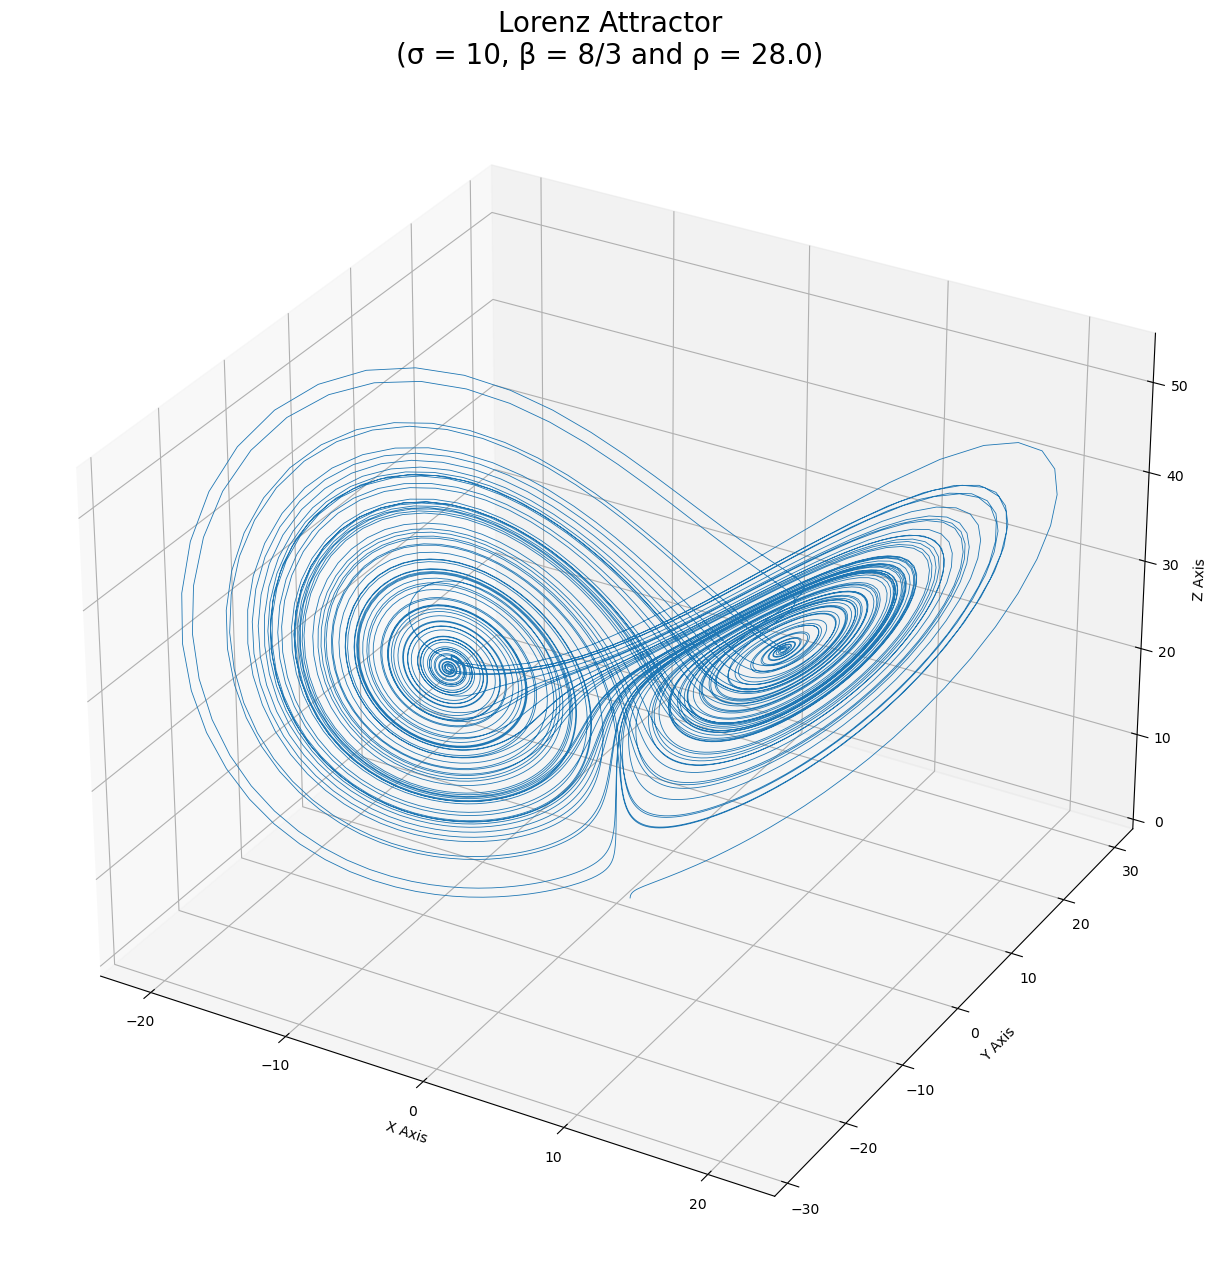

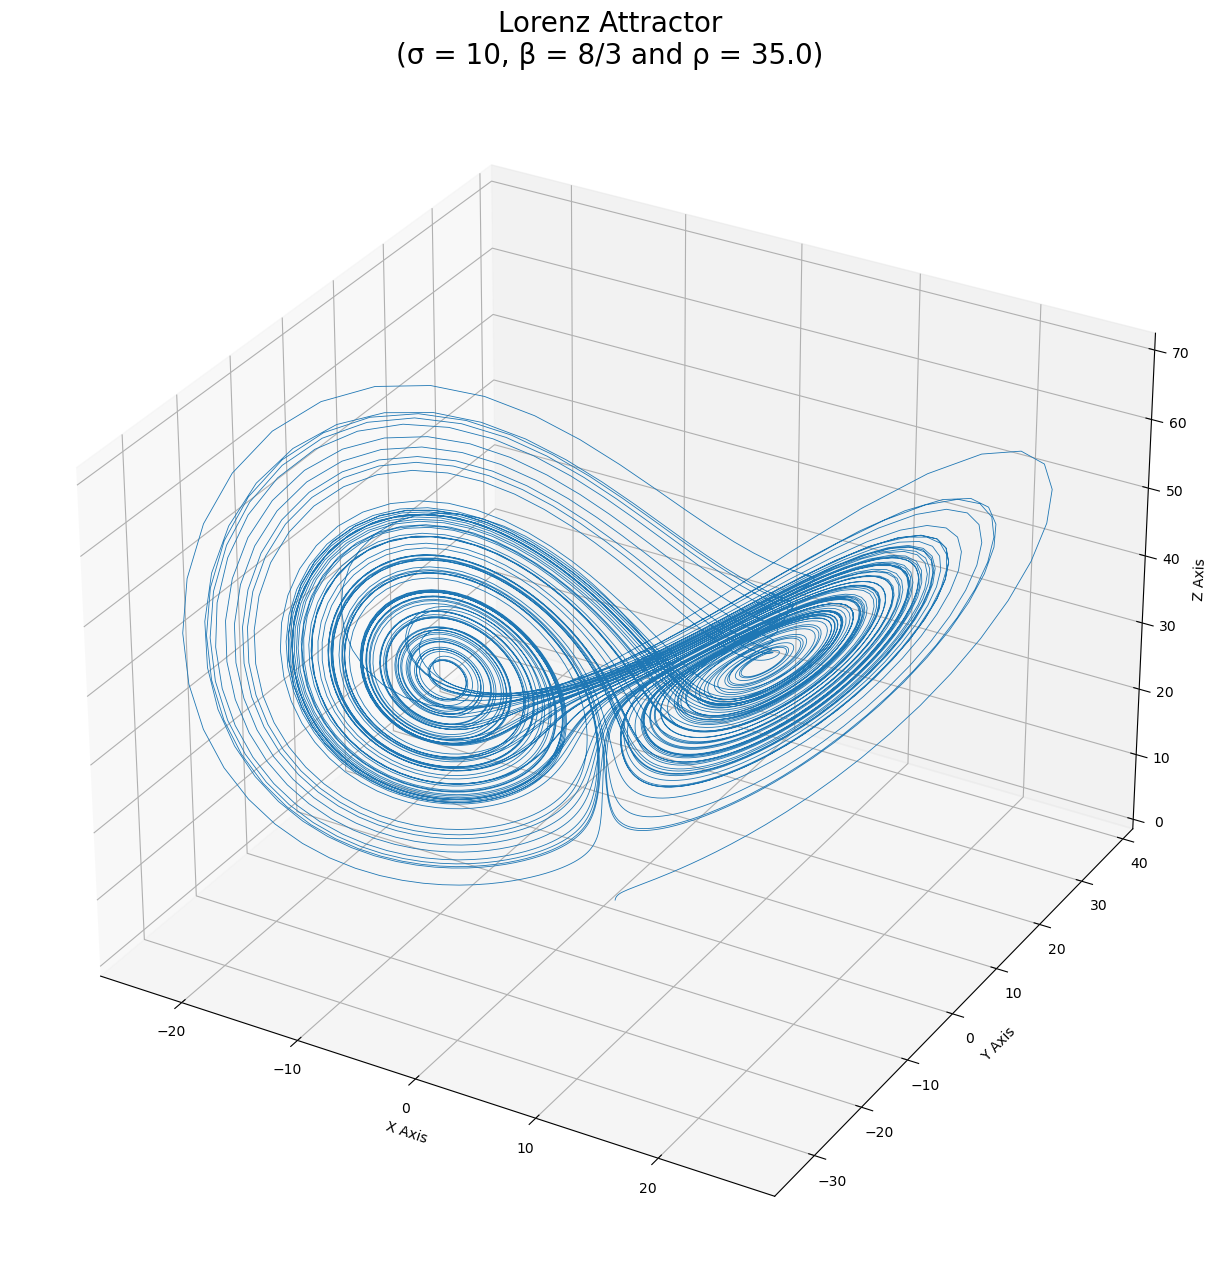

In [12]:
# Parameters
sigma = 10.0
rho_periodic = [13., 14., 15.] # known to produce periodic behavior (from Bifurcation diagram)
rho_chaotic = [25., 28., 35.] # known to produce chaotic behavior (from Bifurcation diagram)
beta = 8.0 / 3.0
dt = 0.01
num_steps = 10000

# Function to integrate and plot the Lorenz system for different values of rho

def plot_lorenz(rho):
    global sigma
    global beta
    
    # Initial conditions
    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = (1., 0., 0.)  # Set initial values

    # Step through "time", calculating the partial derivatives at the current point and using them to estimate the next point
    for i in range(num_steps): 
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], sigma, rho, beta) * dt # updates state for next time step

    # Plot
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xyzs[:, 0], xyzs[:, 1], xyzs[:, 2], lw=0.6)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(f"Lorenz Attractor\n(σ = 10, β = 8/3 and ρ = {rho})", fontsize=20)
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.9, hspace=0.1)
    plt.show()

# Plot periodic behviors
for rho in rho_periodic:
    plot_lorenz(rho)

# Plot chaotic behaviors
for rho in rho_chaotic:
    plot_lorenz(rho)

# Simulating the Lorenz System for Different Initial Positions

/var/folders/t4/tsr_bxjd4yx7wfsg954svp6w0000gp/T/ipykernel_83207/3940332392.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr', len(positions))


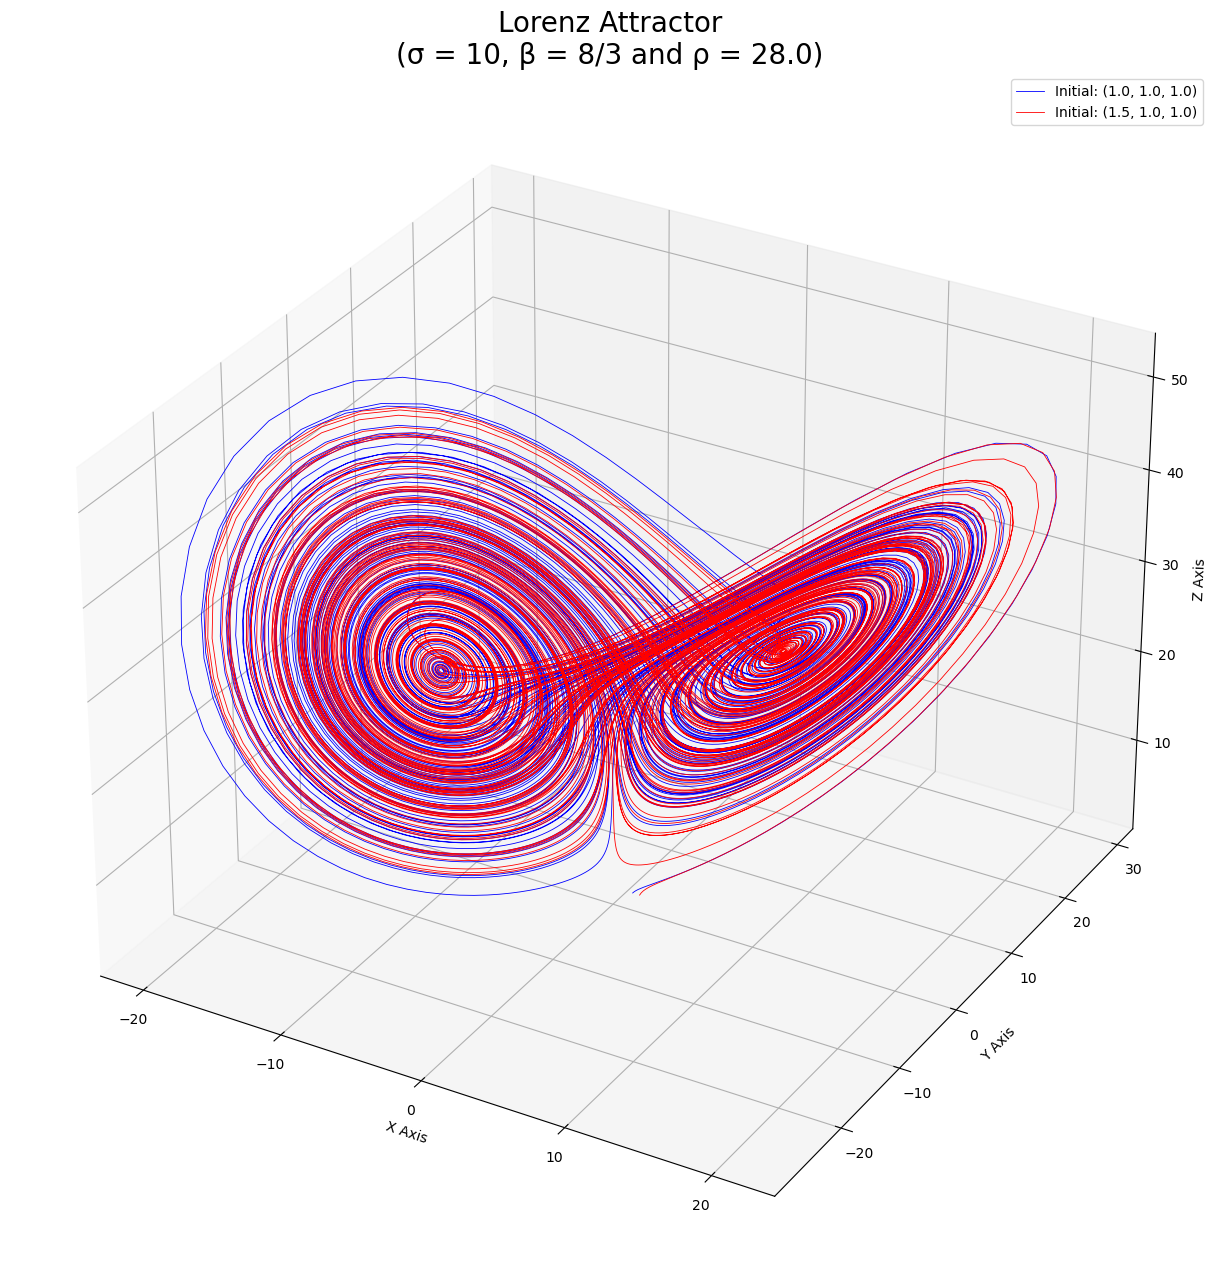

In [13]:
# Parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0
dt = 0.01
num_steps = 15000

# Function to integrate and plot the Lorenz system with different colors for each initial condition
def plot_lorenz_diff_positions(positions):
    global sigma
    global beta
    global rho

    # Create a colormap to vary colors for each path
    cmap = cm.get_cmap('bwr', len(positions))
    colors = cmap(np.linspace(0, 1, len(positions)))

    # Plot
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')

    for idx, xyz in enumerate(positions):
        # Initial conditions
        xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
        xyzs[0] = xyz  # Set initial values

        # Step through "time", calculating the partial derivatives at the current point and using them to estimate the next point
        for i in range(num_steps):
            xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], sigma, rho, beta) * dt # updates state for next time step

        # Plot trajectory with corresponding color
        ax.plot(xyzs[:, 0], xyzs[:, 1], xyzs[:, 2], color=colors[idx], lw=0.6, label=f"Initial: {xyz}")

    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(f"Lorenz Attractor\n(σ = 10, β = 8/3 and ρ = {rho})", fontsize=20)
    ax.legend()

    # Adjust the layout to make sure all labels are visible
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.9, hspace=0.1)
    plt.show()

positions = [(1.0, 1.0, 1.0), (1.5, 1.0, 1.0)]
plot_lorenz_diff_positions(positions)
